In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_path = '/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv'

df = pd.read_csv(data_path)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Text(0.5, 1.0, 'Price Less than 1000')

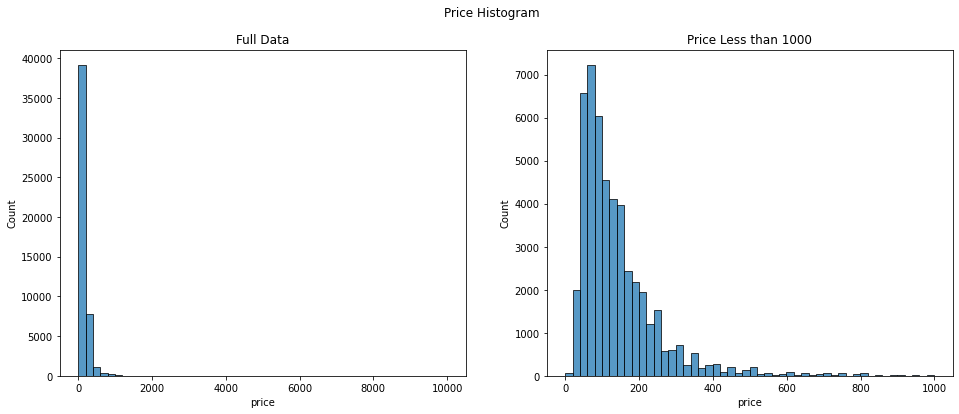

In [30]:
#df.price.max()
#df[df.price == 0]
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Price Histogram')

# Full Data
sns.histplot(df.price,ax=axes[0], bins = 50)
axes[0].set_title("Full Data")

# Price Less than 1000
sns.histplot(df.price[df.price <1000],ax=axes[1], bins = 50)
axes[1].set_title("Price Less than 1000")


In [31]:
features=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month',
          'calculated_host_listings_count','availability_365']
new_df = df[features]
new_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [32]:
new_df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
new_df.minimum_nights.median()

3.0

In [34]:
# we want to split the dataset into train 60%, validation 20% and test 20% data sets

n = len(new_df)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - n_val - n_test

In [35]:
#create an array using the lenght of the dataset and creat a radom dataset
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [36]:
#split dataset in train, validation and test data
df_train = new_df.iloc[idx[:n_train]]
df_val = new_df.iloc[idx[n_train:n_train+n_val]]
df_test =new_df.iloc[idx[n_train+n_val:]] 

In [37]:
#confirm if lenght of dataset is correct
print(len(df_train) == n_train)
print(len(df_val) == n_val)
print(len(df_test) == n_test)

True
True
True


In [38]:
#reset index on all datasets
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [39]:
#convert price to log value and extract price data values for train ,validation and test datasets

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

#drop y-variables from the datasets

df_train.drop('price', axis = 1)
df_val.drop('price', axis = 1)
df_test.drop('price', axis = 1)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.68866,-73.96147,20,24,0.78,1,304
1,40.68554,-73.96651,3,3,0.47,1,0
2,40.76805,-73.94929,1,2,2.00,1,83
3,40.75571,-73.99594,15,0,NaN,1,0
4,40.70780,-74.00675,29,0,NaN,327,349
...,...,...,...,...,...,...,...
9774,40.84650,-73.94319,1,0,NaN,1,0
9775,40.73957,-74.00082,2,4,1.90,1,76
9776,40.78318,-73.97372,30,1,0.34,5,261
9777,40.77508,-73.97990,2,11,0.13,1,2


In [40]:
#handling NAs 

def prepare_data_NAs(df_train):
    #options 1 - fill with mean
    reviews_mean = df_train.reviews_per_month.mean()
    df_train_review_mean = df_train.fillna(reviews_mean)
    X_mean_fill = df_train_review_mean.values

    #options 1 - fill with 0
    df_train_review_zero = df_train.fillna(0)
    X_zero_fill = df_train_review_zero.values
    return X_mean_fill,X_zero_fill

In [41]:
#extract X data for both scenerio
X_mean_fill,X_zero_fill = prepare_data_NAs(df_train)

In [42]:
#linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [43]:
#run_model on both scenerio
w0_mean,w_mean = train_linear_regression(X_mean_fill, y_train)
w0_zero,w_zero = train_linear_regression(X_zero_fill, y_train)


In [44]:
#root mean square error check with validation data
# prepare validation data
X_mean_fill_val,X_zero_fill_val = prepare_data_NAs(df_val)

#make predictions
y_mean_val_pred = w0_mean + X_mean_fill_val.dot(w_mean)
y_zero_val_pred = w0_zero + X_zero_fill_val.dot(w_zero)

#function to check the RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse),3)

#print result for bioth scenerio
print(rmse(y_val,y_mean_val_pred))
print(rmse(y_val,y_zero_val_pred))

0.506
0.506


In [45]:
def prepare_data(df_train):
    #options 1 - fill with mean
    #reviews_mean = df_train.reviews_per_month.mean()
    #df_train_review_mean = df_train.fillna(reviews_mean)
    #X_mean_fill = df_train_review_mean.values
    
    #options 1 - fill with 0
    df_train_review_zero = df_train.fillna(0)
    X_zero_fill = df_train_review_zero.values
    return X_zero_fill

In [46]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [47]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_data(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_data(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)
    
    print(r, w0, score)

0 -292.511381613965 0.51
1e-06 -292.47566475504925 0.51
0.0001 -288.98236968137525 0.51
0.001 -260.6777675262201 0.51
0.01 -131.69117444163626 0.52
0.1 -22.13902119152979 0.53
1 -2.3746554200183287 0.53
5 -0.47709290336447646 0.53
10 -0.23817732788091925 0.53


In [48]:
seed_df=new_df.copy()
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seed_scores=[]
def seed_selection(new_df,seed=9):
    for i in seed:
        #create an array using the lenght of the dataset and creat a radom dataset
        n = len(new_df)
        idx = np.arange(n)
        np.random.seed(i)
        np.random.shuffle(idx)
        
        #split dataset in train, validation and test data
        df_train = new_df.iloc[idx[:n_train]]
        df_val = new_df.iloc[idx[n_train:n_train+n_val]]
        df_test =new_df.iloc[idx[n_train+n_val:]]
        
        #reset index on all datasets
        df_train.reset_index(drop=True,inplace=True)
        df_val.reset_index(drop=True,inplace=True)
        df_test.reset_index(drop=True,inplace=True)
         
        #convert price to log value and extract price data values for train ,validation and test datasets

        y_train = np.log1p(df_train.price.values)
        y_val = np.log1p(df_val.price.values)
        y_test = np.log1p(df_test.price.values)

        #drop y-variables from the datasets
        df_train.drop('price', axis = 1)
        df_val.drop('price', axis = 1)
        df_test.drop('price', axis = 1)
        
        #train model
        X_train = prepare_data(df_train)
        w0, w = train_linear_regression(X_train, y_train)
        
        #predict
        X_val = prepare_data(df_val)
        y_pred = w0 + X_val.dot(w)
        
        #check RMSE score
        score = rmse(y_val, y_pred)
        seed_scores.append(score)
        
        print(i,score)
        

In [49]:
seed_selection(seed_df,seed)

0 0.508
1 0.553
2 0.51
3 0.535
4 0.49
5 0.487
6 0.484
7 0.477
8 0.536
9 0.495


In [50]:
round(np.std(seed_scores),3)

0.025

In [51]:
        #create an array using the lenght of the dataset and creat a radom dataset
        n = len(new_df)
        idx = np.arange(n)
        np.random.seed(9)
        np.random.shuffle(idx)
        
        #split dataset in train, validation and test data
        df_train = new_df.iloc[idx[:n_train]]
        df_val = new_df.iloc[idx[n_train:n_train+n_val]]
        df_test =new_df.iloc[idx[n_train+n_val:]]
        
        #reset index on all datasets
        df_train.reset_index(drop=True,inplace=True)
        df_val.reset_index(drop=True,inplace=True)
        df_test.reset_index(drop=True,inplace=True)
         
        #convert price to log value and extract price data values for train ,validation and test datasets

        y_train = np.log1p(df_train.price.values)
        y_val = np.log1p(df_val.price.values)
        y_test = np.log1p(df_test.price.values)

        #drop y-variables from the datasets
        df_train.drop('price', axis = 1)
        df_val.drop('price', axis = 1)
        df_test.drop('price', axis = 1)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.80419,-73.94792,1,1,0.16,1,365
1,40.84012,-73.86521,1,1,0.03,1,0
2,40.67018,-73.98752,2,2,1.22,1,102
3,40.73638,-73.98453,2,0,NaN,1,0
4,40.67515,-73.95435,3,10,0.14,2,95
...,...,...,...,...,...,...,...
9774,40.66748,-73.92554,2,56,0.94,1,1
9775,40.77362,-73.99133,8,0,NaN,1,4
9776,40.70457,-73.91603,2,40,1.49,3,319
9777,40.73939,-73.99612,10,18,0.90,1,0


In [52]:
#validation and test data

df_train_full = pd.concat([df_train, df_val])
df_train_full= df_train_full.reset_index(drop=True)

X_train_full = prepare_data(df_train_full)

y_full_train = np.concatenate([y_train, y_val])


In [53]:
#run model on combined data
w0, w = train_linear_regression_reg(X_train_full, y_full_train,r=0.001)

X_test = prepare_data(df_test)
y_test_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_test_pred)
print(score)

0.52


In [54]:
#sns.histplot(y_test, bins = 50,color='red',alpha=0.3)
#sns.histplot(y_test_pred, bins = 50,color='blue',alpha=0.3)